# Quantum Key Distribution

In [1]:
# some imports and helper functions 
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
from qiskit.quantum_info import Statevector, random_statevector

import numpy as np
import random
print("Imports Successful")

def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message


def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample


Imports Successful


# Theory

Some explainations of how transmission of qubits can be achieved and wrong decoding or interception can change the result.

<b>1.  Answer is correctly transmitted</b>

A bit is set by Alice, encoding in a specific way and decoded by Bob. If the encoding and decoding is the same, the information received by Bob is correct.

😓 Play around and set the bitsToSend to 1 or 0 and see the result. Verify that the value defined by Alice (left) is always the same as measured by Bob (right)

Sending information bitToSend = 1


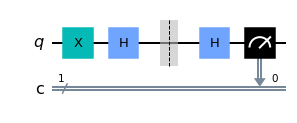

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


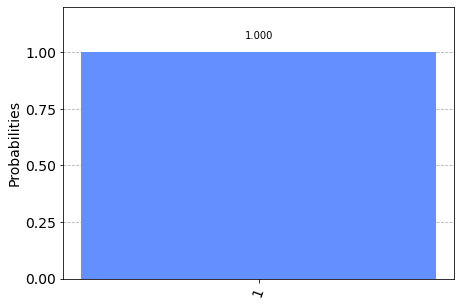

In [2]:
################ FILL YOUR CODE HERE
# bits to send
# bitToSend = 0 or 1
# bitToSend = randint(2, size=1)
bitToSend = 1

print("Sending information bitToSend = " + str(bitToSend))

# create circuit 
qc = QuantumCircuit(1,1)

if bitToSend:
    qc.x(0)

# Alice prepares qubit in state |+>
qc.h(0)

# Alice now sends the qubit to Bob
qc.barrier(0)

# who measures it in the X-basis (same as ALice)
qc.h(0)


qc.measure(0,0)

display(qc.draw())

# Draw and simulate circuit
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

<b> 2.) Information is misunderstood by Bob

Communication is bad. 

😓 How can this be fixed? There are two ways to fix it. (Solution 1 and Solution 2)

Sending information bitToSend = [0]


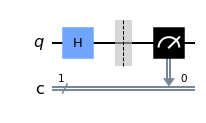

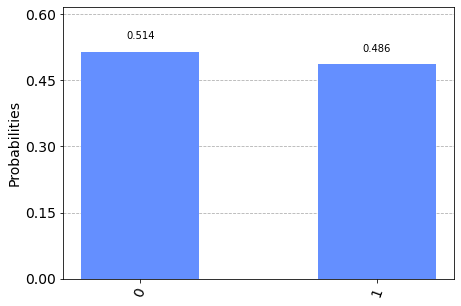

In [4]:
# bits to send
# bitToSend = 0 or 1
bitToSend = randint(2, size=1)

print("Sending information bitToSend = " + str(bitToSend))

# create circuit 
qc = QuantumCircuit(1,1)

if bitToSend:
    qc.x(0)

################ FILL YOUR CODE HERE
# Solution 1: remove the encoding at Alice
qc.h(0)

# Alice now sends the qubitN to Bob
qc.barrier(0)

################ FILL YOUR CODE HERE
# Solution 2: add the missing encoding at Bob
#qc.h(0)

qc.measure(0,0)

display(qc.draw())

# Draw and simulate circuit
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

<b> 3.) And now Eve intercepts the communication  

📣 From instructor: explains how interception destroys the measurement

😓 where is actually Eve sitting and doing the espionage?

😓 bonus: explain if the result of interception is different from the wrong decoding. It looks the same, but it is really the same? 

Sending information bitToSend = [1]


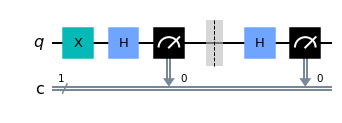

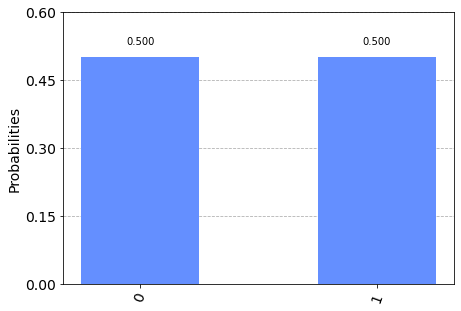

In [5]:
# bits to send
# bitToSend = 0 or 1
bitToSend = randint(2, size=1)

print("Sending information bitToSend = " + str(bitToSend))

qc = QuantumCircuit(1,1)

if bitToSend:
    qc.x(0)

qc.h(0)

################ FILL YOUR CODE HERE
# SOLUTION: add the mesaurement of Eve here
# Alice now sends the qubit to Bob
# but Eve intercepts and tries to read it
qc.measure(0, 0)

qc.barrier()

qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

# 2. Basic Quantum Key Distriction Protocol 

1. Alice generates a random bit string a a random bases
2. Alice then encodes each bit onto a string of qubits using the basis she chose
3. Bob then measures each qubit at random, for example, he might use the bases
4. Bob and Alice then publicly share which basis they used for each qubit. If Bob measured a qubit in the same basis Alice prepared it in, they use this to form part of their shared secret key, otherwise they discard the information for that bit.
5. Bob and Alice share a random sample of their keys, and if the samples match, they can be sure (to a small margin of error) that their transmission is successful.



In [6]:
np.random.seed(seed=0)
n = 50

# Step 1 - Generate some random bits

In [7]:
# Alice generates bits
alice_bits = randint(2, size=n)

print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1]


# Step 2 generate random basis and encode message

Alice generates a random basis for tranmission. A 0 or a 1 describes the encoding of the bit. 

In [8]:
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)

print(alice_bases)

message = encode_message(alice_bits, alice_bases)

[0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 1 0 0 1 1 0]


After generation of the basis, Alice encodes the information. For every bit a circuit has been generated.

😓 show the circuits for each qubit or all of them.

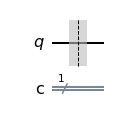

In [9]:
################ FILL YOUR CODE HERE
message[0].draw()

# Step 3 - Generate random basis for Bob

Now Bob generates a random basis which is applied before measurement.

😓 Generate a random list of bits for Bob. Hint: Alice did the same before.

In [10]:
################ FILL YOUR CODE HERE
bob_bases = randint(2, size=n)
print(bob_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1]


In [11]:
bob_results = measure_message(message, bob_bases)
print(bob_results)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]


Since Alice sent the qubit and Bob added his random decoding and measurement, the circuits are final. Go on and draw the final circuits.

😓 Add the code to draw the final circuit

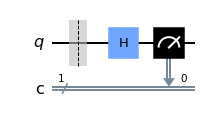

In [12]:
################ FILL YOUR CODE HERE

message[0].draw()

# Step 4 - Clean up the measurements

In [13]:
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]


In [14]:
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]


# Step 5 - Compare the keys

In [15]:
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]
alice_sample = [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]


In [17]:
if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("There was no interception!")

There was no interception!


And from here one the key can be used for encryption....

# And now Eve comes into play

Where does Eve appears? At what place and how is the interception done.

Note: this code has to be added at the right place.
```
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)
```

In [18]:
np.random.seed(seed=3)

## Step 1
alice_bits = randint(2, size=n)

## Step 2
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

################ FILL YOUR CODE HERE
eve_bases = randint(2, size=n)
intercepted_message = measure_message(message, eve_bases)


## Step 3
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))

alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
alice_sample = [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]


In [20]:
if bob_sample != alice_sample:
    print("Eve's interference was detected.")
else:
    print("There was no interception!")

Eve's interference was detected.


See bonus exercises in "bonus 1 - transmit_text.ipynb" and "bonus 2 - transmit_image.ipynb" to learn how to use QKD for encrpyting data.